In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from getdist import plots
from getdist import mcsamples
import getdist

from matplotlib import rc, rcParams

rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size' : 18})
cols = ['#29A2C6','#FF6D31','#FFCB18','#73B66B','#EF597B', '#333333']

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18}

## FR

In [5]:
labels=[r'U_{e1}', r'U_{e2}', r'U_{e3}', \
        r'U_{\mu1}', r'U_{\mu2}', r'U_{\mu3}', \
        r'U_{\tau1}', r'U_{\tau2}', r'U_{\tau3}', \
        r'\phi_e', r'\phi_\mu']

In [6]:
Tchain = np.load('/data/mandalia/flavour_ratio/data/mcmc_chain.npy')
Tsample=mcsamples.MCSamples(samples=Tchain,labels=labels,names=[str(i) for i in range(11)])

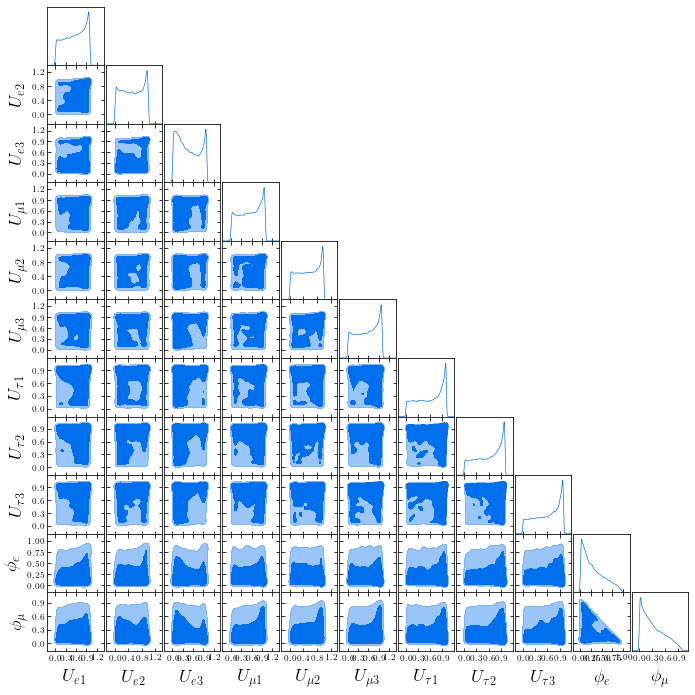

In [7]:
g = plots.getSubplotPlotter(width_inch=10)
g.settings.legend_fontsize=20
g.settings.axes_fontsize=9
g.settings.figure_legend_frame = False
g.triangle_plot([Tsample], 
                filled=True, legend_labels=["Posterior"],
                legend_loc="upper right",)
g.export("fr_posterior.pdf")

## Sterile

In [2]:
labels=[r"N_{atm}",r"\Delta \gamma",r"{\rm DOM}_{\rm eff}",r"R_{\pi K}",r"R_{\nu\bar\nu}",r"\delta_J"]

In [3]:
Tchain=np.genfromtxt("./data/chains/sterile_chain.dat")
Tsample=mcsamples.MCSamples(samples=Tchain,labels=labels,names=[str(i) for i in range(6)])

In [4]:
prior_cov=np.diag((0.4,0.05,0.3,0.1,0.1,0.1))
prior_cov=prior_cov**2
prior_means=np.array([1.0,0.0,1.0,1.0,1.,0.])
prior_vecs=np.random.multivariate_normal(prior_means,prior_cov,1000000)

prior_samples=mcsamples.MCSamples(samples=prior_vecs,labels=labels,names=[str(i) for i in range(6)],
                                  #ranges=[[0,5],[-1,1],[0,2],
                                  #  [0,100],[0,100],[-1,1],
                                  #  [-31,20],[0,np.pi],[None,None]
                                  # ]
                                 )

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


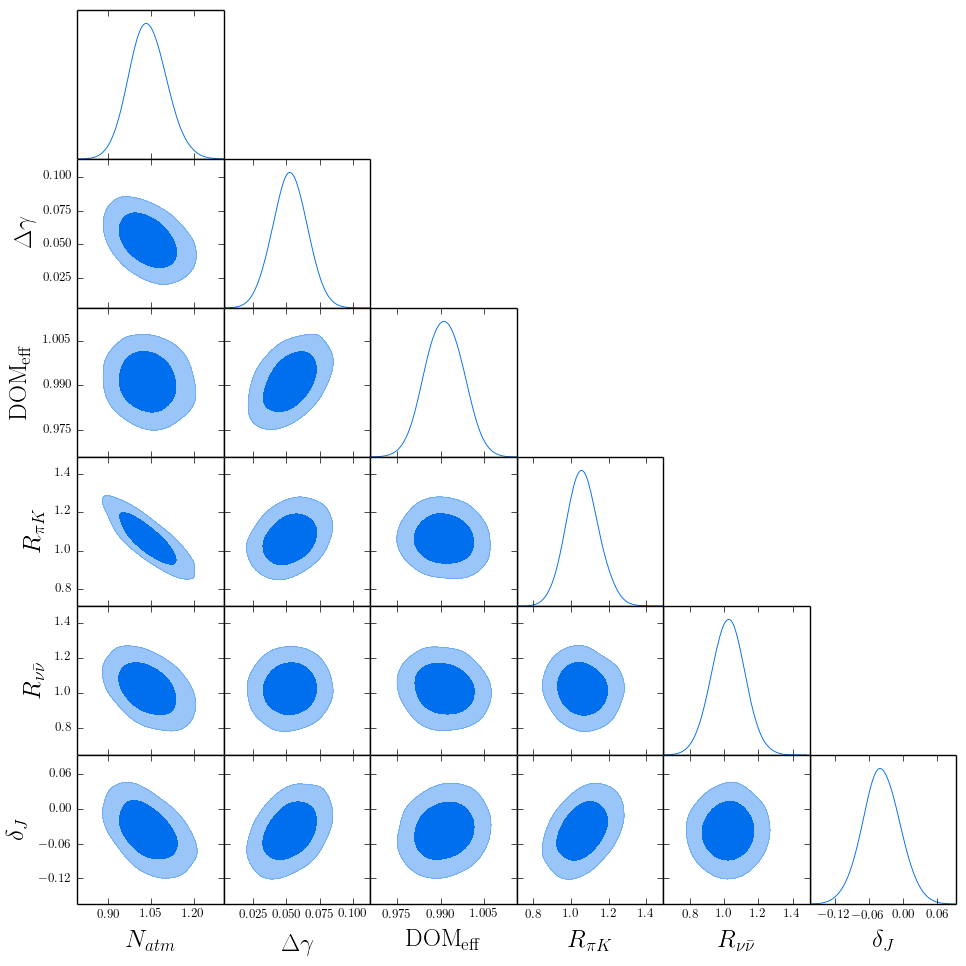

In [5]:
g = plots.getSubplotPlotter(width_inch=10)
g.settings.legend_fontsize=20
g.settings.axes_fontsize=9
g.settings.figure_legend_frame = False
g.triangle_plot([Tsample], 
                filled=True, legend_labels=["Posterior"],
                legend_loc="upper right",)
g.export("sterile_posterior.pdf")

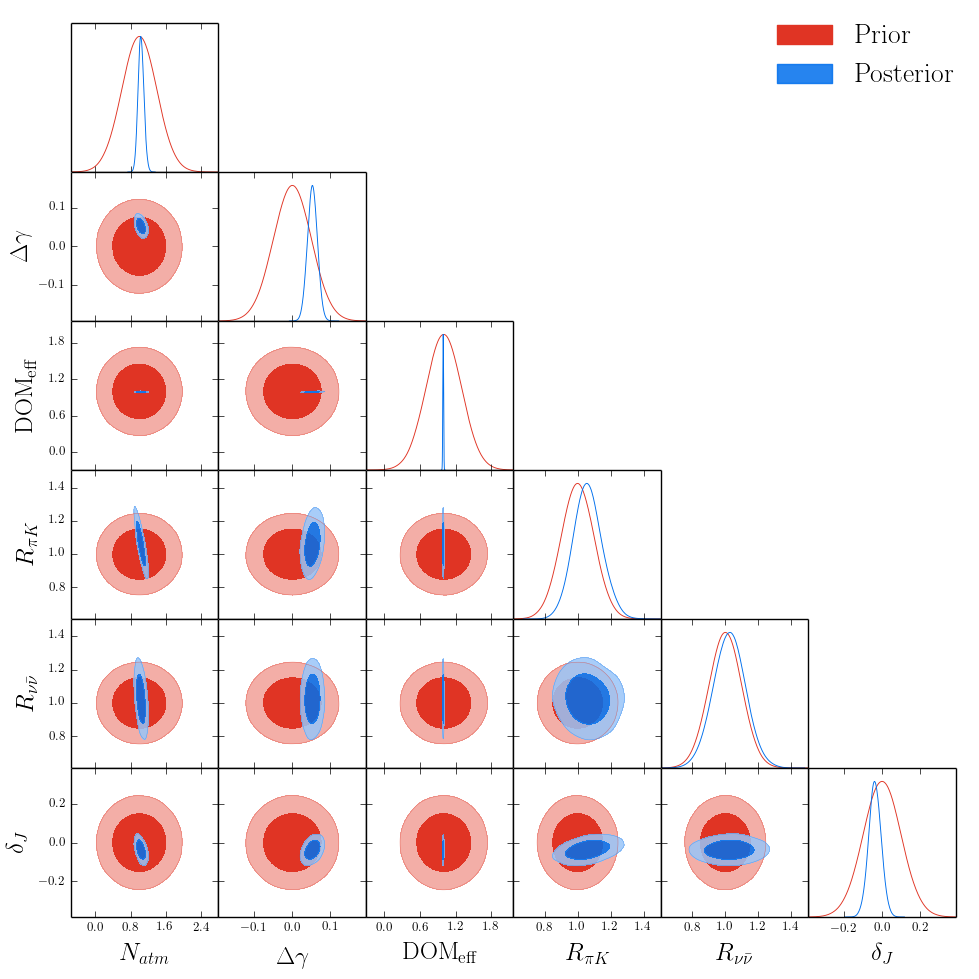

In [6]:
g = plots.getSubplotPlotter(width_inch=10)
g.settings.legend_fontsize=20
g.settings.axes_fontsize=9
g.settings.figure_legend_frame = False
g.triangle_plot([prior_samples,Tsample], 
                filled=True, legend_labels=["Prior","Posterior"],
                legend_loc="upper right",)
g.export("sterile_prior_posterior.pdf")

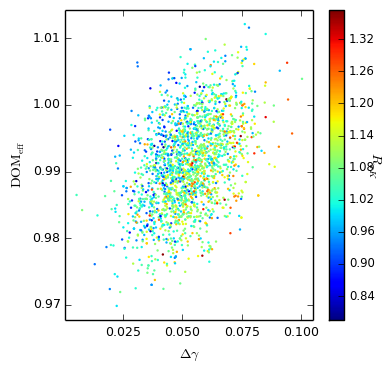

In [23]:
g = plots.getSubplotPlotter(width_inch=4)
g.settings.legend_fontsize=20
g.settings.axes_fontsize=9

g.plot_3d([Tsample],["1","2","3"])

In [4]:
print Tsample.getTable().tableTex()

\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$N_{atm}        $} & $1.04^{+0.14}_{-0.13}      $\\

{\boldmath$\Delta \gamma  $} & $0.053^{+0.026}_{-0.026}   $\\

{\boldmath${\rm DOM}_{\rm eff}$} & $0.991^{+0.013}_{-0.013}   $\\

{\boldmath$R_{\pi K}      $} & $1.06^{+0.18}_{-0.17}      $\\

{\boldmath$R_{\nu\bar\nu} $} & $1.02^{+0.19}_{-0.19}      $\\

{\boldmath$\delta_J       $} & $-0.038^{+0.066}_{-0.065}  $\\
\hline
\end{tabular}


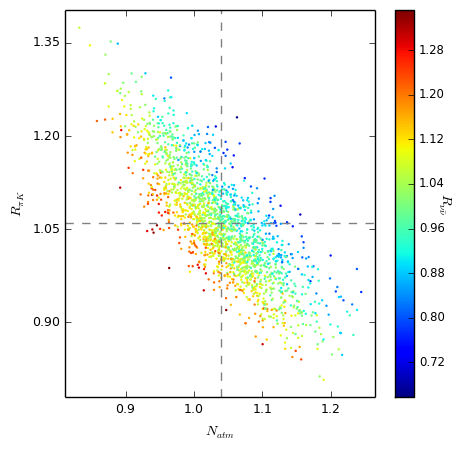

In [48]:
g = plots.getSubplotPlotter(width_inch=5)
g.settings.legend_fontsize=9
g.settings.axes_fontsize=9
g.settings.figure_legend_frame = False
g.plot_3d([Tsample], ["0","3","4"])
#ax=g.subplots[[0]]
plt.axvline(1.04, color='gray', ls='--')
plt.axhline(1.06, color='gray', ls='--')
g.export("sterile_crazy.pdf")

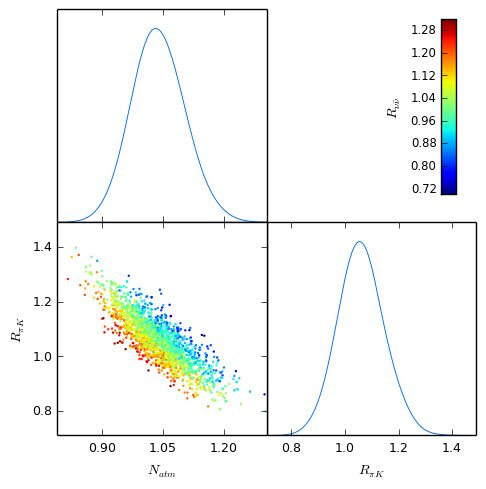

In [32]:
g = plots.getSubplotPlotter(width_inch=5)
g.settings.legend_fontsize=9
g.settings.axes_fontsize=9
g.settings.figure_legend_frame = False
g.triangle_plot([Tsample], ["0","3"], plot_3d_with_param="4",
                filled=True, #legend_labels=["Prior","Posterior"],
                legend_loc="upper right",)
g.export("sterile_crazy.pdf")

## Neutrino decay

In [110]:
labels=[r"N_{atm}",r"\Delta \gamma",r"R_{\pi K}",r"R_{\nu\bar\nu}",r"{\rm DOM}_{\rm eff}",
        r"m_s",r"\theta_{24}/rad",r"\log\tau/eV^{-1}"]

In [113]:
Tchain=np.load("./data/chains/chain_decay.npy")
Tsample=mcsamples.MCSamples(samples=Tchain,labels=labels,
                           ranges=[[0,2],[-1,1],[0,2],
                                    [0,2],[0,2],[0.01,10],
                                    [0.001,np.pi/2.],[10,30]
                                   ]
                           )

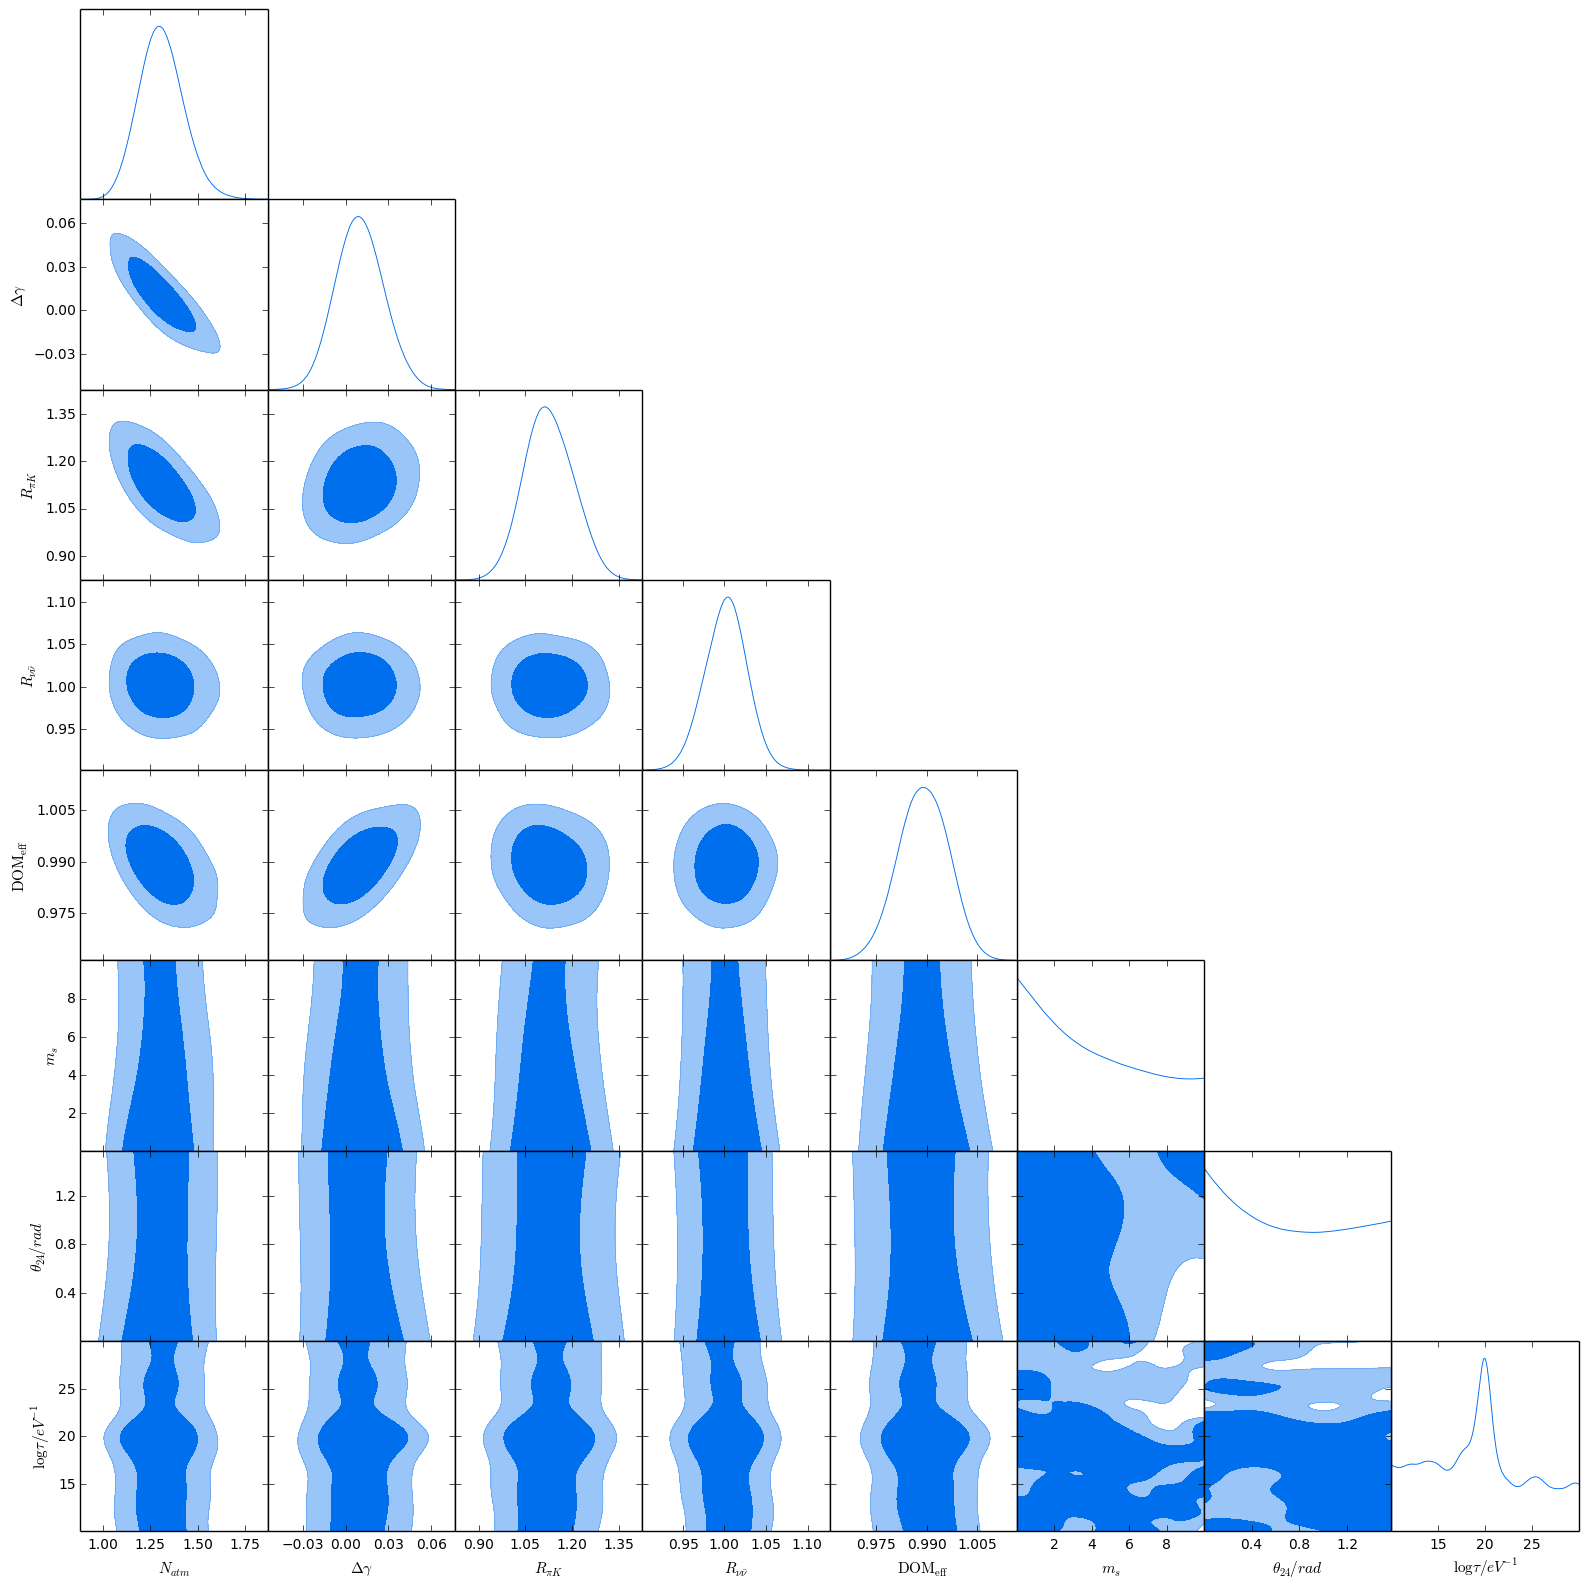

In [114]:
g = plots.getSubplotPlotter()
g.settings.legend_fontsize=25
g.settings.figure_legend_frame = False
g.triangle_plot([Tsample], filled=True,
                legend_loc="upper right",)

## Lorentz Violation

In [2]:
labels=[r"N_{atm}",r"\Delta \gamma",r"R_{\pi K}",
        r"N_{prompt}",r"N_{astro}",r"\Delta \gamma_{astro}",
        r"\rho/{\rm GeV}",r"\cos\theta",r"\phi/rad"]

### Dimension 3

In [2]:
labels=[r"N_{atm}",r"\Delta \gamma",r"R_{\pi K}",
        r"N_{prompt}",r"N_{astro}",r"\Delta \gamma_{astro}",
        r"\rho/{\rm GeV}",r"\cos\theta_3",r"\phi/rad"]

TchainNAN=np.load("./data/neo_lv_chains/chain_full_3.npy")
TsampleNAN=mcsamples.MCSamples(samples=TchainNAN,
                               names=["norm","deltag","rpik","prompt","astro","deltaa","rho","cth","phi"],
                            ranges=[[0.8,2.1],[-0.06,0.06],[0.7,1.6],
                                    [0,20],[0,20],[-0.5,0.5],
                                    [-31,-20],[-1,1],[-np.pi-0.1,np.pi]
                                  ],
                            labels=labels,)

#TsampleNAN.num_bins_2D=500
#TsampleNAN.fine_bins_2D=500
#TsampleNAN.smooth_scale_2D=0.03

prior_cov=np.diag((0.1,0.05,0.1,1.0e6,1.0e6,0.5,1.0e6,1.0e6,1.0e6))
prior_cov=prior_cov**2
prior_means=np.array([1.0,0.0,1.0,0.,0.,0.,-28,np.pi/2.,0.])
prior_vecs=np.random.multivariate_normal(prior_means,prior_cov,10000000)

prior_vecs[:,-1]=np.random.uniform(-np.pi,np.pi,10000000)
prior_vecs[:,-2]=np.random.uniform(0,np.pi,10000000)
prior_vecs[:,-3]=np.random.uniform(-31,-28,10000000)
prior_vecs[:,-5]=np.random.uniform(0,10,10000000)
prior_vecs[:,-6]=np.random.uniform(0,10,10000000)

prior_samples=mcsamples.MCSamples(samples=prior_vecs,labels=labels,ranges=[[0,5],[-1,1],[0,2],
                                    [0,100],[0,100],[-1,1],
                                    [-31,20],[0,np.pi],[None,None]
                                   ])

/Users/carlos/Library/Python/2.7/lib/python/site-packages/getdist/kde_bandwidth.py:70: RuntimeWarning: divide by zero encountered in double_scalars
  return h - (2 * N * rootpi * f) ** (-1. / 5)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':


ValueError: f(a) and f(b) must have different signs

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


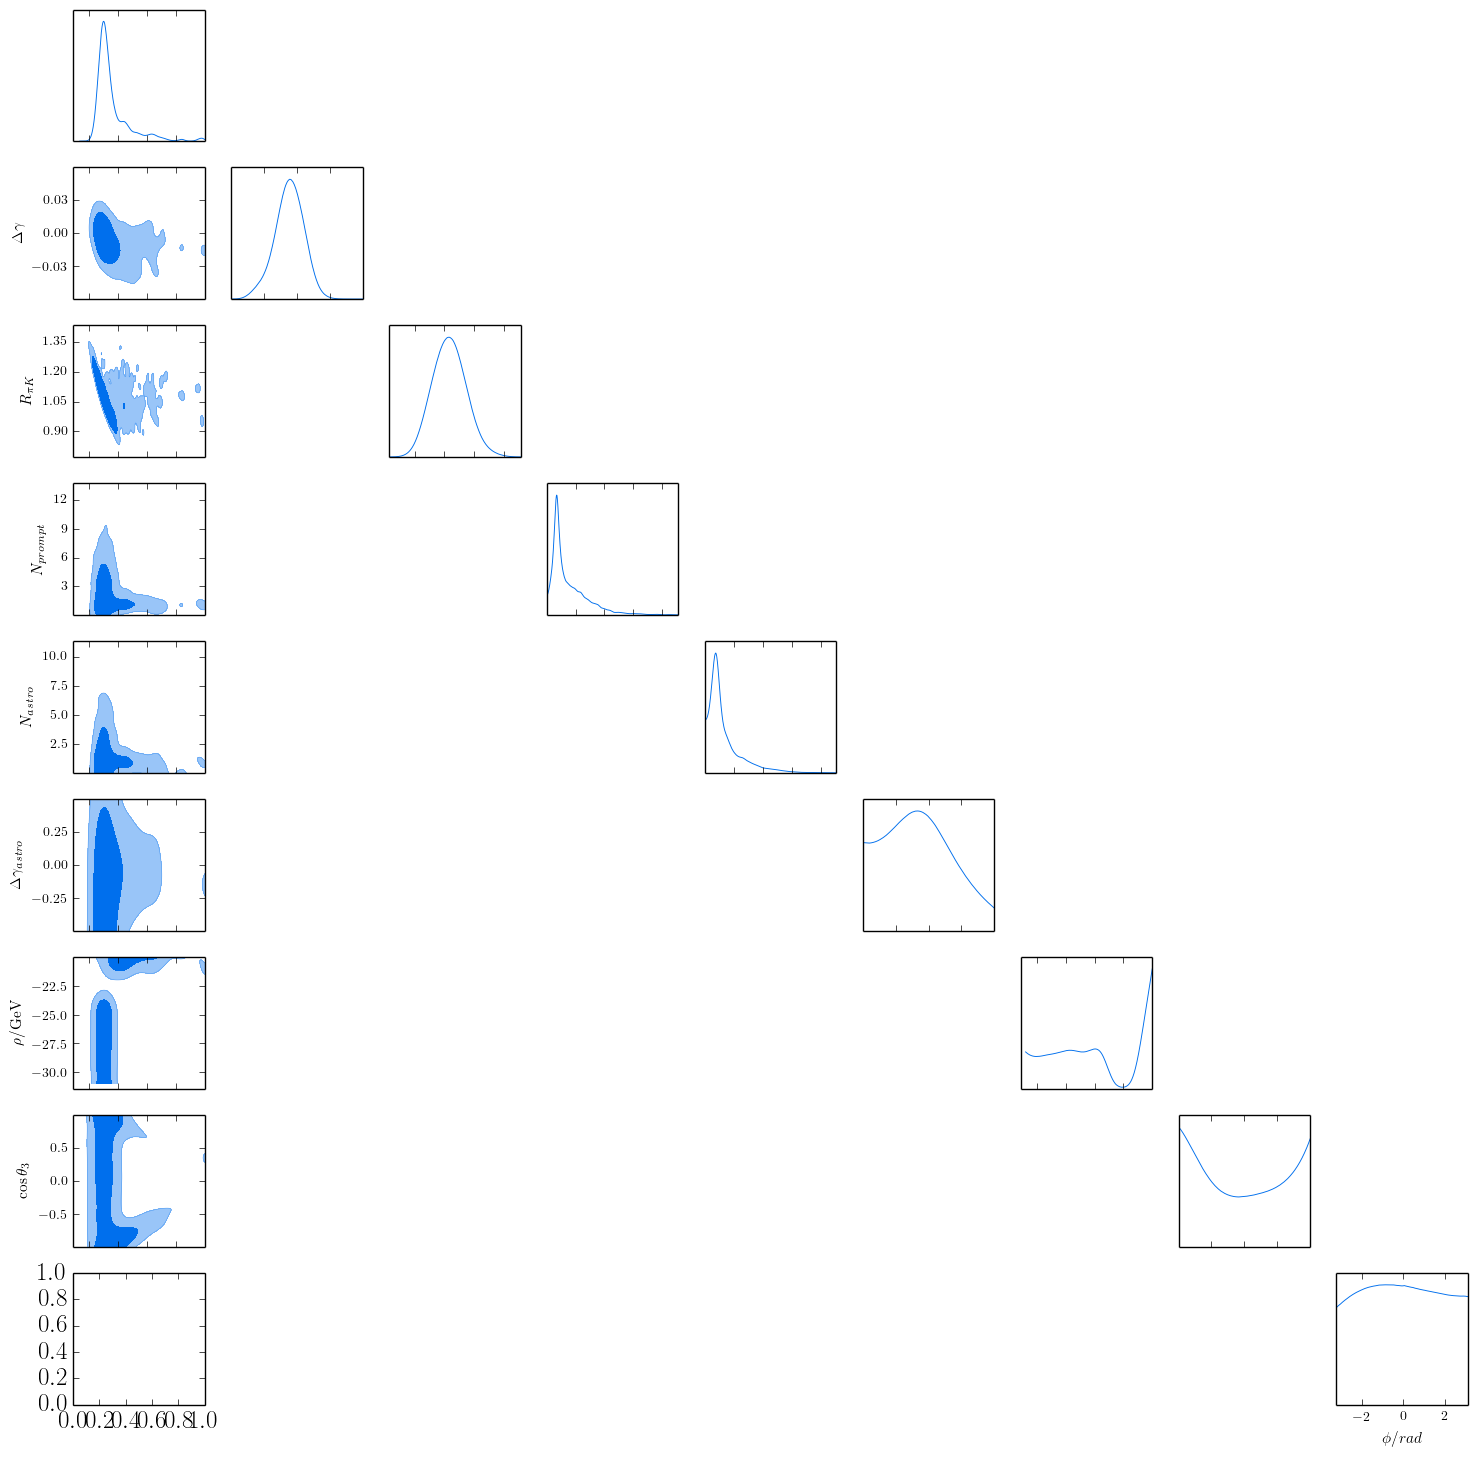

In [3]:
g = plots.getSubplotPlotter()
g.settings.legend_fontsize=25
g.settings.figure_legend_frame = False
g.triangle_plot([TsampleNAN], filled=True, 
                legend_labels = ["With a high energy cut","Without a high energy cut"],
                legend_loc="upper right",)

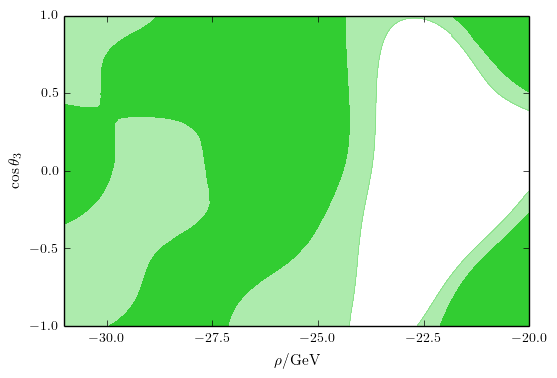

In [100]:
g.plot_2d([TsampleNAN],param1="rho",param2="cth", filled=True, colors = ("limegreen","k"));

### Dimension 4

In [101]:
labels=[r"N_{atm}",r"\Delta \gamma",r"R_{\pi K}",
        r"N_{prompt}",r"N_{astro}",r"\Delta \gamma_{astro}",
        r"\rho_4",r"\cos\theta_4",r"\phi/rad"]

In [102]:
TchainNAN=np.load("./data/neo_lv_chains/chain_full_4.npy")
TsampleNAN=mcsamples.MCSamples(samples=TchainNAN,
                               names=["norm","deltag","rpik","prompt","astro","deltaa","rho","cth","phi"],
                            ranges=[[0.8,2.1],[-0.06,0.06],[0.7,1.6],
                                    [0,20],[0,20],[-0.5,0.5],
                                    [-31,-20],[-1,1],[-np.pi-0.1,np.pi]
                                  ],
                            labels=labels,)

prior_samples=mcsamples.MCSamples(samples=prior_vecs,labels=labels,ranges=[[0,5],[-1,1],[0,2],
                                    [0,100],[0,100],[-1,1],
                                    [-31,20],[0,np.pi],[None,None]
                                   ])

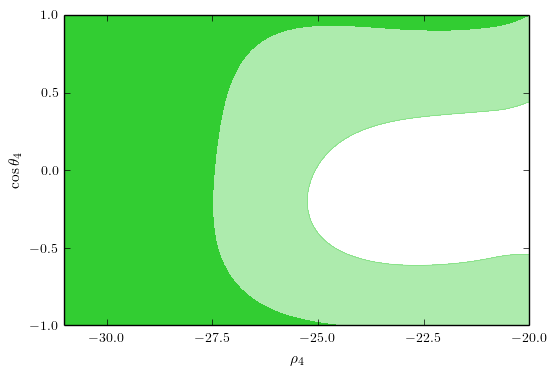

In [103]:
g.plot_2d([TsampleNAN],param1="rho",param2="cth",
          filled=True, colors = ("limegreen","k"));

### Dimension 5

-30.9999066567 -20.0002112747


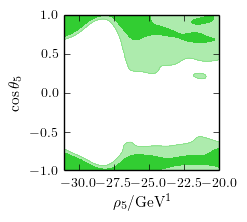

In [6]:
labels=[r"N_{atm}",r"\Delta \gamma",r"R_{\pi K}",
        r"N_{prompt}",r"N_{astro}",r"\Delta \gamma_{astro}",
        r"\rho_5/{\rm GeV^1}",r"\cos\theta_5",r"\phi/rad"]

TchainNAN=np.load("./data/neo_lv_chains/chain_full_5.npy")
print np.min(TchainNAN[:,6]),np.max(TchainNAN[:,6])
TsampleNAN=mcsamples.MCSamples(samples=TchainNAN,
                               names=["norm","deltag","rpik","prompt","astro","deltaa","rho","cth","phi"],
                            ranges=[[0.5,2.1],[-0.06,0.06],[0.0,2.0],
                                    [0,20],[0,20],[-0.5,0.5],
                                    [-31,-20],[-1,1],[-np.pi,np.pi]
                                  ],
                            labels=labels,)

g = plots.getSubplotPlotter()
g.plot_2d([TsampleNAN],param1="rho",param2="cth",
          filled=True, colors = ("limegreen","k"));

### Dimension 6

-37.9999683562 -27.0000596478


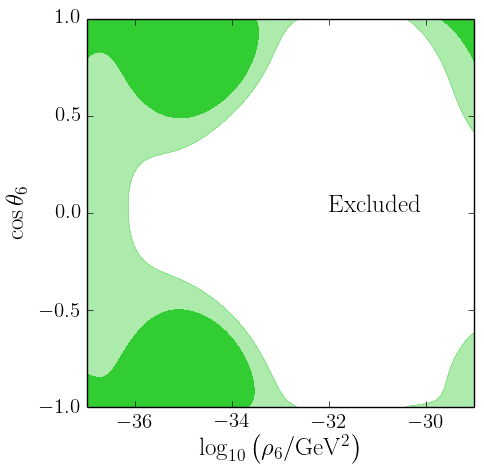

In [15]:
labels=[r"N_{atm}",r"\Delta \gamma",r"R_{\pi K}",
        r"N_{prompt}",r"N_{astro}",r"\Delta \gamma_{astro}",
        r"\log_{10}\left(\rho_6/{\rm GeV^2}\right)",r"\cos\theta_6",r"\phi/rad"]

TchainNAN=np.load("./data/neo_lv_chains/chain_full_6.npy")
print np.min(TchainNAN[:,6]),np.max(TchainNAN[:,6])
TsampleNAN=mcsamples.MCSamples(samples=TchainNAN,
                               names=["norm","deltag","rpik","prompt","astro","deltaa","rho","cth","phi"],
                            ranges=[[0.8,2.1],[-0.06,0.06],[0.7,1.6],
                                    [0,20],[0,20],[-0.5,0.5],
                                    [-38,-27],[-1,1],[-np.pi,np.pi]
                                  ],
                            labels=labels,)

g = plots.getSubplotPlotter(width_inch=5)
g.settings.legend_fontsize=20
g.settings.axes_fontsize=15
g.plot_2d([TsampleNAN],param1="rho",param2="cth",
          filled=True, colors = ("limegreen","k"));
plt.xlim(-37, -29)

g.export("LV_dim6.eps")

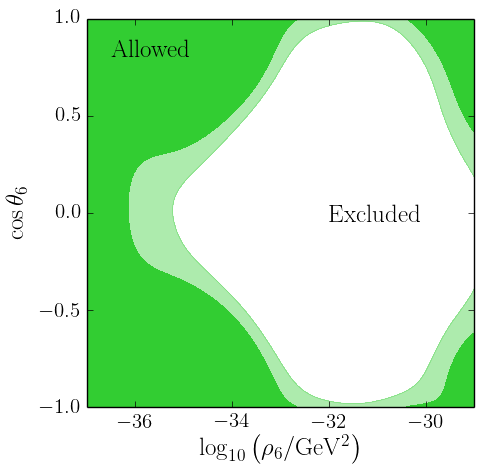

In [26]:
TsampleNAN.updateSettings({'contours': [0.95, 0.99]})

g = plots.getSubplotPlotter(width_inch=5)
g.settings.legend_fontsize=20
g.settings.axes_fontsize=15
g.plot_2d([TsampleNAN],param1="rho",param2="cth",
          filled=True, colors = ("limegreen","k"));
plt.xlim(-37, -29)
plt.text(-32,-0.05,"Excluded")
plt.text(-36.5,0.8,"Allowed")
g.export("LV_dim6.eps")

-41.793204386 -20.0001375371


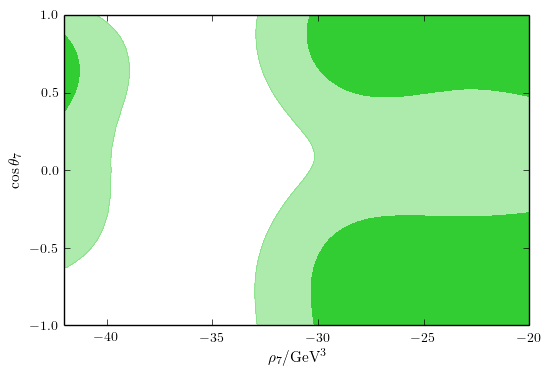

In [106]:
labels=[r"N_{atm}",r"\Delta \gamma",r"R_{\pi K}",
        r"N_{prompt}",r"N_{astro}",r"\Delta \gamma_{astro}",
        r"\rho_7/{\rm GeV^3}",r"\cos\theta_7",r"\phi/rad"]

TchainNAN=np.load("./data/neo_lv_chains/chain_full_7.npy")
print np.min(TchainNAN[:,6]),np.max(TchainNAN[:,6])
TsampleNAN=mcsamples.MCSamples(samples=TchainNAN,
                               names=["norm","deltag","rpik","prompt","astro","deltaa","rho","cth","phi"],
                            ranges=[[0.8,2.1],[-0.06,0.06],[0.7,1.6],
                                    [0,20],[0,20],[-0.5,0.5],
                                    [-42,-20],[-1,1],[-np.pi,np.pi]
                                  ],
                            labels=labels,)

g.plot_2d([TsampleNAN],param1="rho",param2="cth",
          filled=True, colors = ("limegreen","k"));

-45.9427077138 -20.0011589311


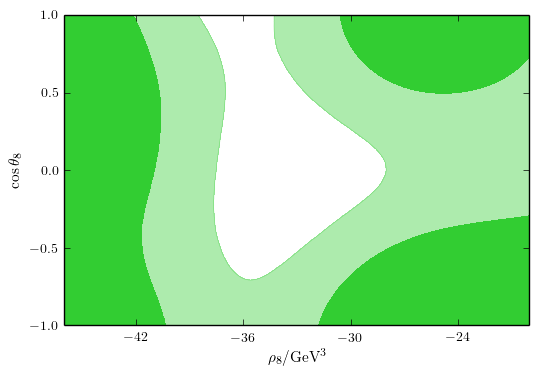

In [107]:
labels=[r"N_{atm}",r"\Delta \gamma",r"R_{\pi K}",
        r"N_{prompt}",r"N_{astro}",r"\Delta \gamma_{astro}",
        r"\rho_8/{\rm GeV^3}",r"\cos\theta_8",r"\phi/rad"]

TchainNAN=np.load("./data/neo_lv_chains/chain_full_8.npy")
print np.min(TchainNAN[:,6]),np.max(TchainNAN[:,6])
TsampleNAN=mcsamples.MCSamples(samples=TchainNAN,
                               names=["norm","deltag","rpik","prompt","astro","deltaa","rho","cth","phi"],
                            ranges=[[0.8,2.1],[-0.06,0.06],[0.7,1.6],
                                    [0,20],[0,20],[-0.5,0.5],
                                    [-46,-20],[-1,1],[-np.pi,np.pi]
                                  ],
                            labels=labels,)

g.plot_2d([TsampleNAN],param1="rho",param2="cth",
          filled=True, colors = ("limegreen","k"));

In [8]:
# old

TchainNAN=np.load("./data/chains/chain_full_nan.npy")
TsampleNAN=mcsamples.MCSamples(samples=TchainNAN,
                            #ranges=[[0,5],[-1,1],[0,2],
                            #        [0,100],[0,100],[-1,1],
                            #        [-31,20],[0,np.pi],[-np.pi-0.1,np.pi+0.1]
                            #       ],
                            labels=labels,)

#TsampleNAN.num_bins_2D=500
#TsampleNAN.fine_bins_2D=500
#TsampleNAN.smooth_scale_2D=0.03

TchainWAN=np.load("./data/chains/chain_full_ntemps1.npy")
TsampleWAN=mcsamples.MCSamples(samples=TchainWAN,
                            ranges=[[0,5],[-1,1],[0,2],
                                    [0,100],[0,100],[-1,1],
                                    [-31,20],[0,np.pi],[-np.pi-0.1,np.pi+0.1]
                                   ],
                            labels=labels,)

#TsampleWAN.num_bins_2D=500
#TsampleWAN.fine_bins_2D=500
#TsampleWAN.smooth_scale_2D=0.03

prior_cov=np.diag((0.1,0.05,0.1,1.0e6,1.0e6,0.5,1.0e6,1.0e6,1.0e6))
prior_cov=prior_cov**2
prior_means=np.array([1.0,0.0,1.0,0.,0.,0.,-28,np.pi/2.,0.])
prior_vecs=np.random.multivariate_normal(prior_means,prior_cov,10000000)

prior_vecs[:,-1]=np.random.uniform(-np.pi,np.pi,10000000)
prior_vecs[:,-2]=np.random.uniform(0,np.pi,10000000)
prior_vecs[:,-3]=np.random.uniform(-31,-28,10000000)
prior_vecs[:,-5]=np.random.uniform(0,10,10000000)
prior_vecs[:,-6]=np.random.uniform(0,10,10000000)

prior_samples=mcsamples.MCSamples(samples=prior_vecs,labels=labels,ranges=[[0,5],[-1,1],[0,2],
                                    [0,100],[0,100],[-1,1],
                                    [-31,20],[0,np.pi],[None,None]
                                   ])

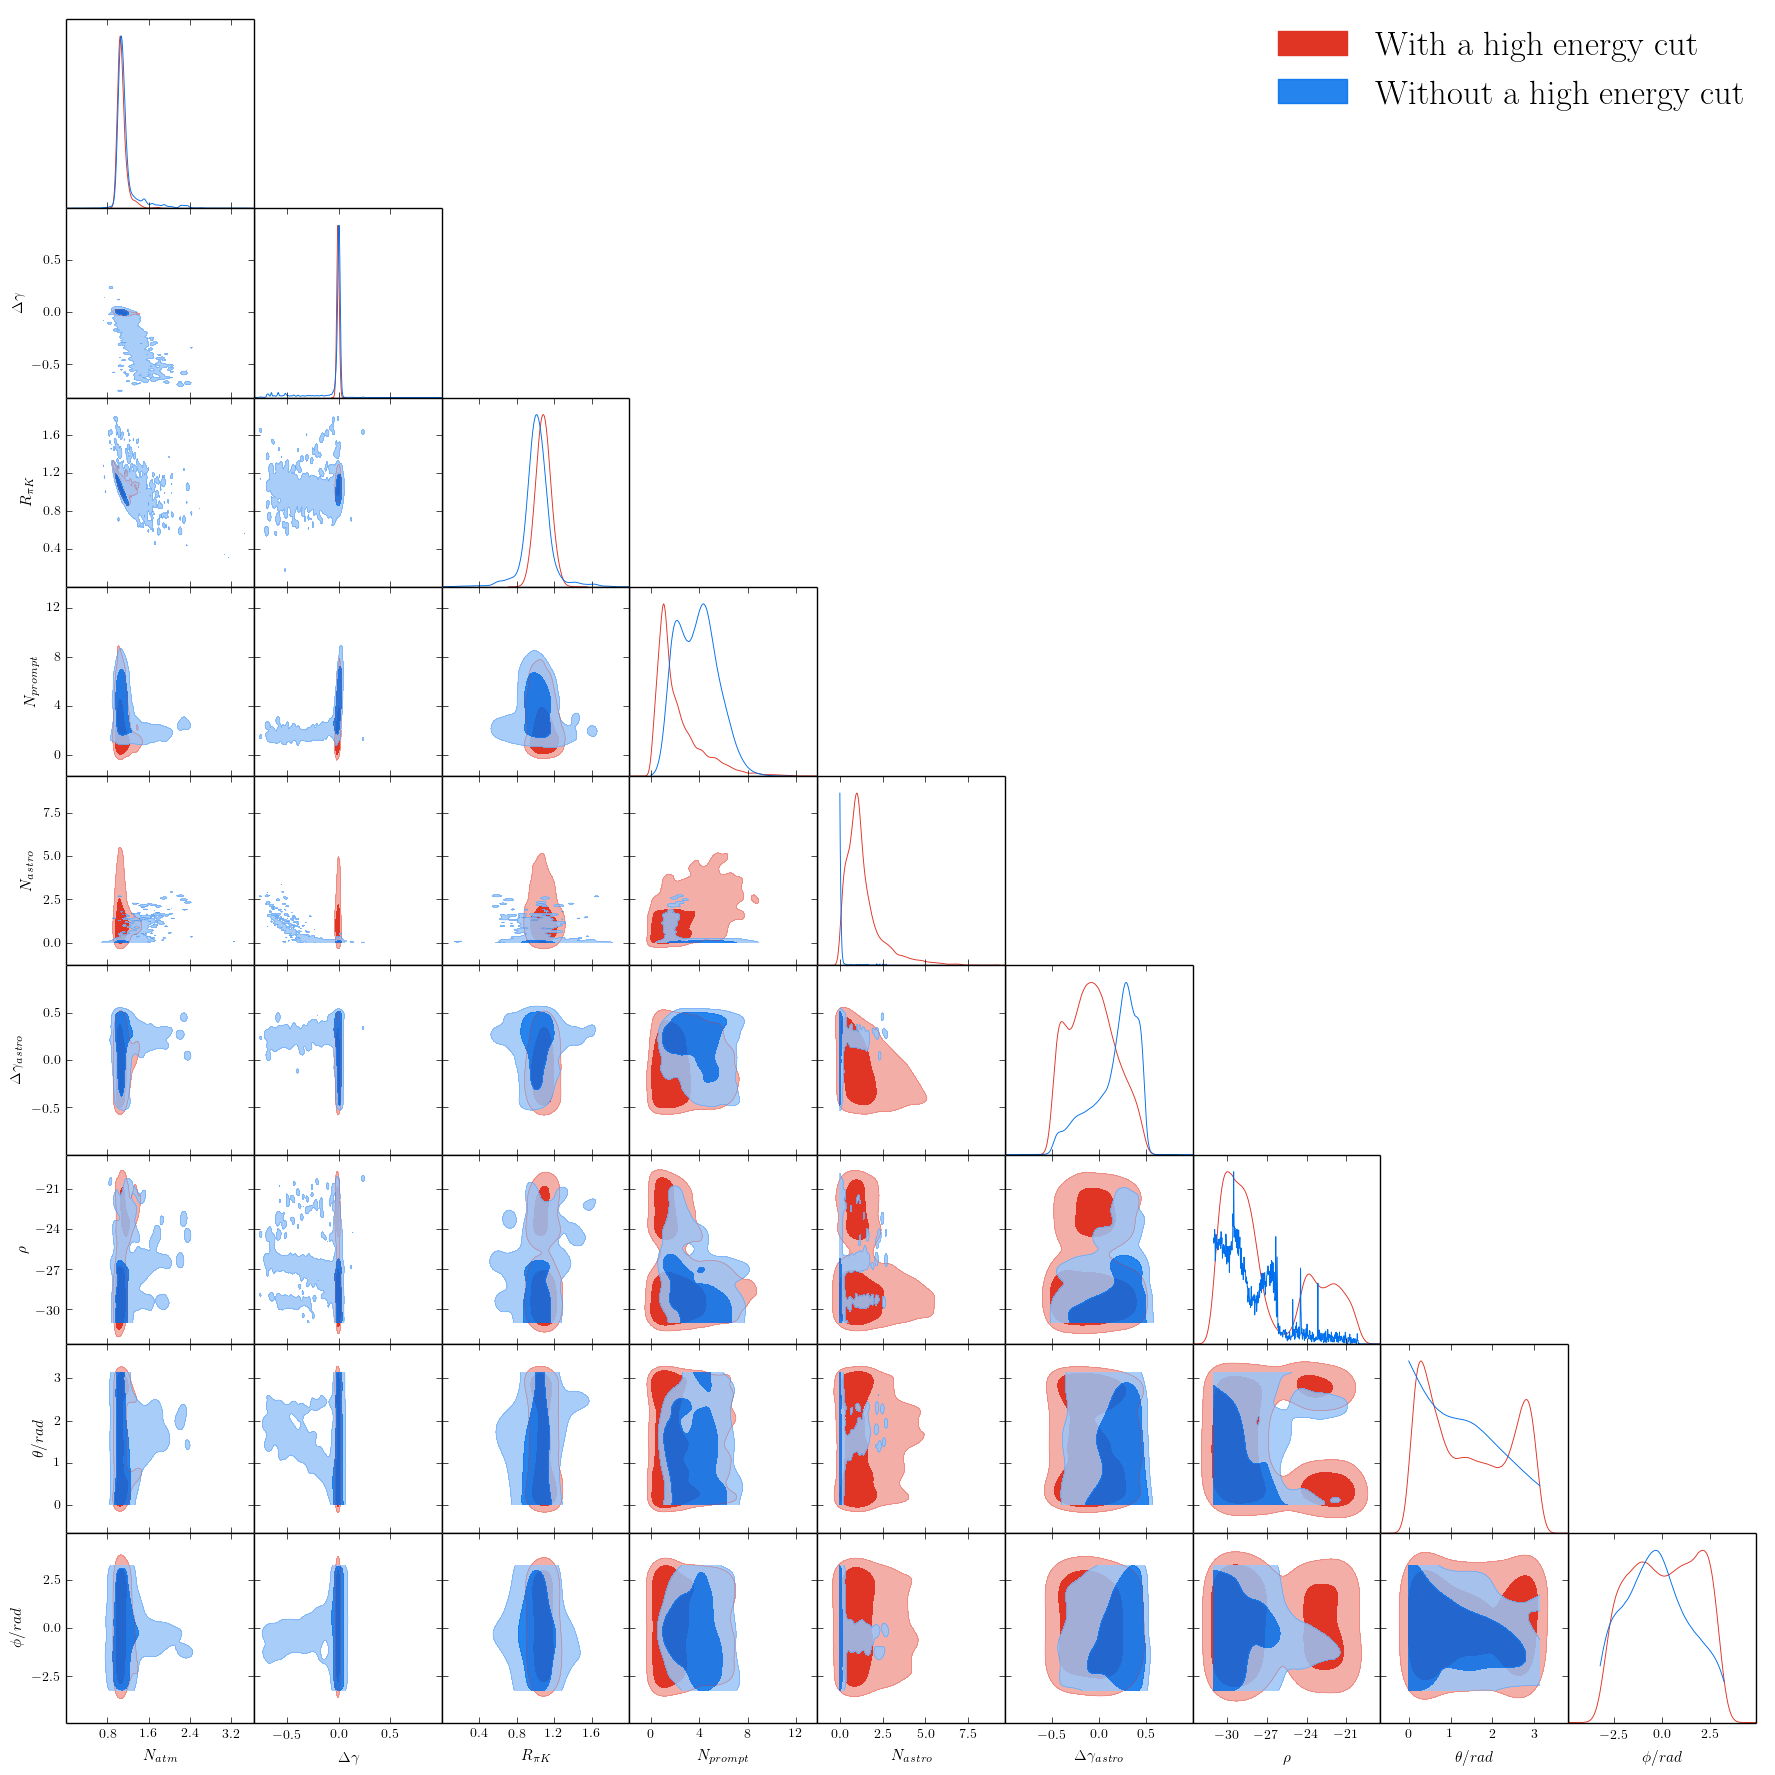

In [9]:
# old plot
g = plots.getSubplotPlotter()
g.settings.legend_fontsize=25
g.settings.figure_legend_frame = False
g.triangle_plot([TsampleNAN,TsampleWAN], filled=True, 
                legend_labels = ["With a high energy cut","Without a high energy cut"],
                legend_loc="upper right",)
#g.export("combined_triangle_result_cterm.pdf")

## AAAA

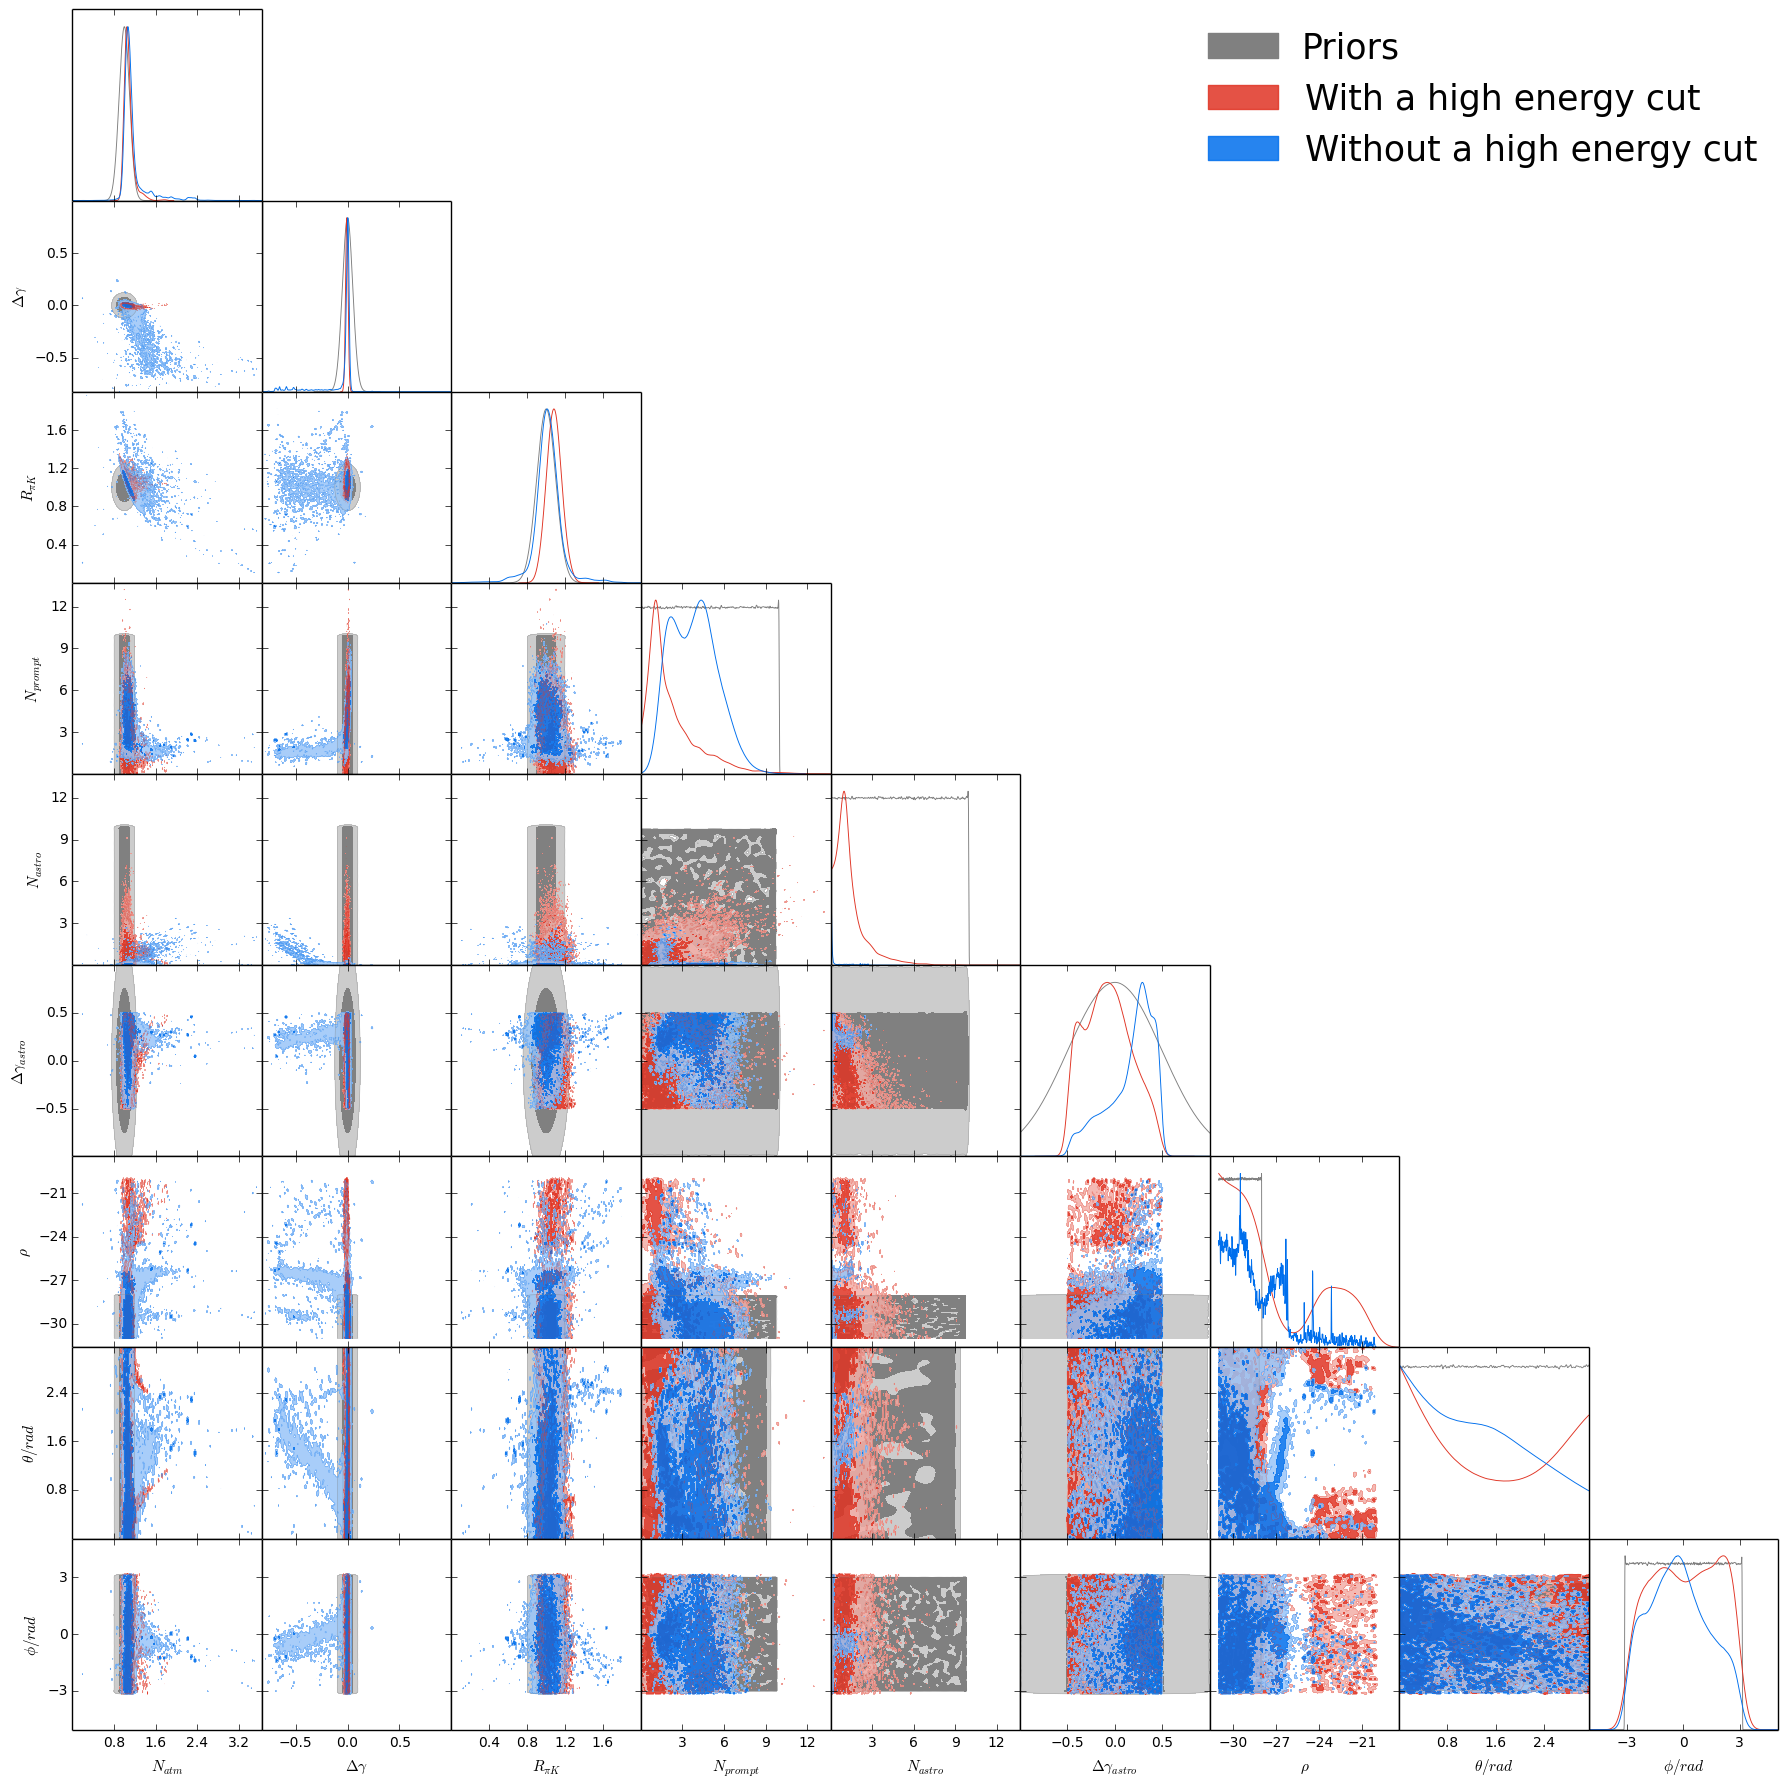

In [97]:
g = plots.getSubplotPlotter()
g.settings.legend_fontsize=25
g.settings.figure_legend_frame = False
g.triangle_plot([prior_samples,TsampleNAN,TsampleWAN], filled=True, 
                legend_labels = ["Priors","With a high energy cut","Without a high energy cut"],
                legend_loc="upper right",)

In [67]:
for i in TchainWAN.flatten():
    if np.isnan(i):
        print i

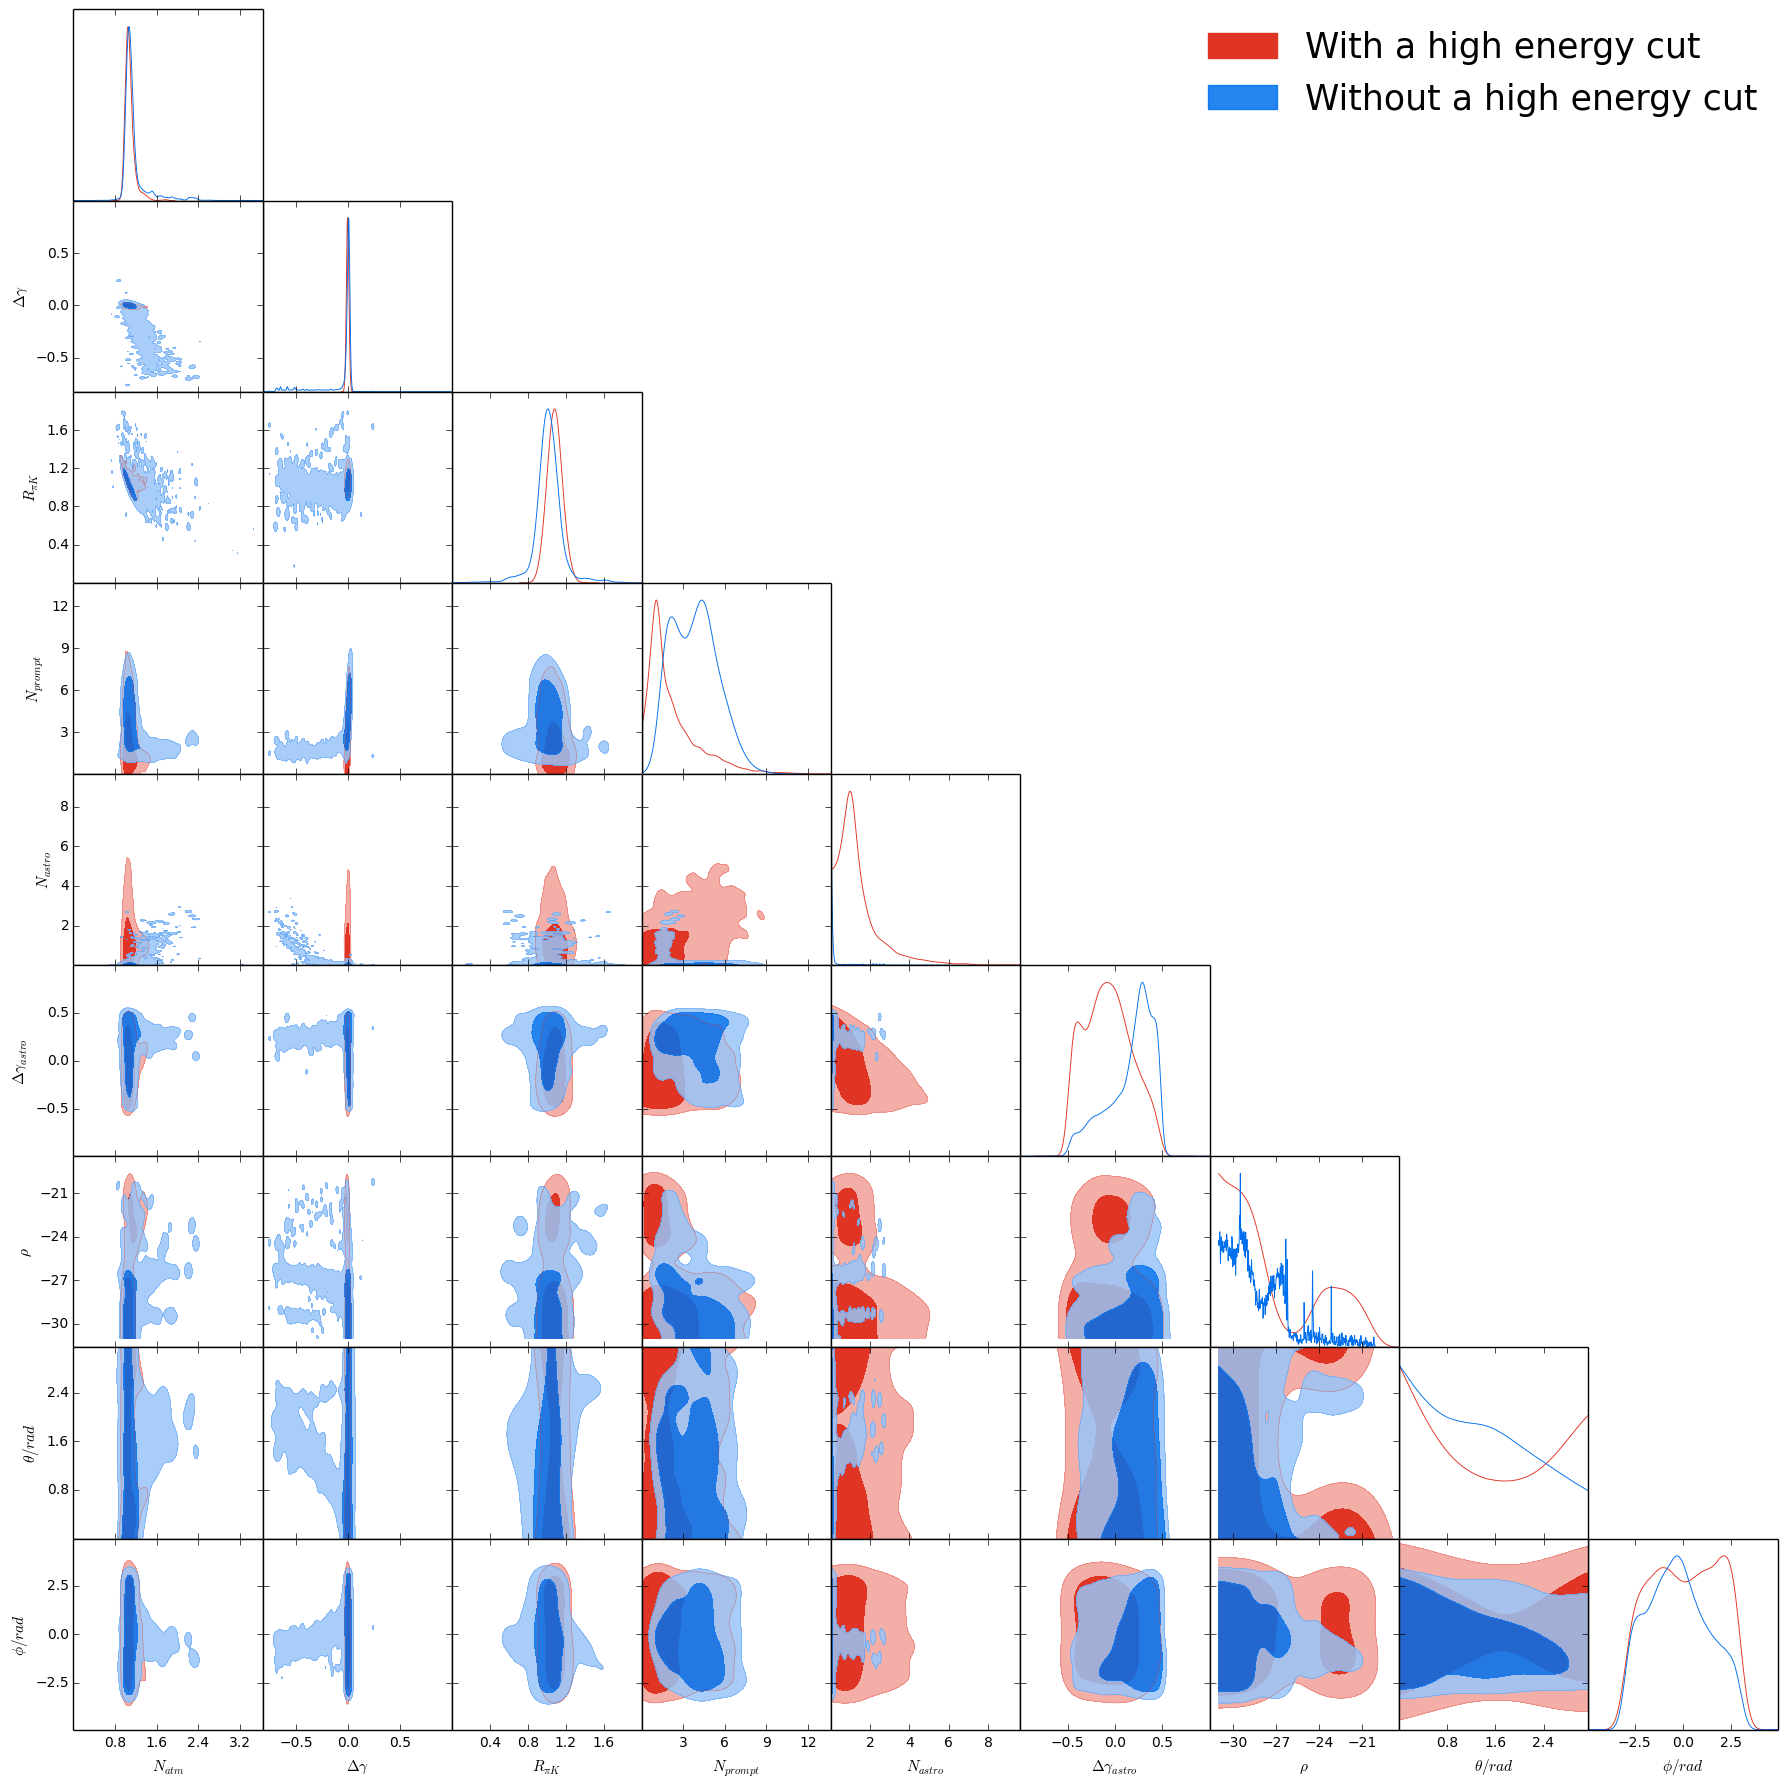

In [102]:
g.export("combined_triangle_result_cterm.pdf")